# Telecom Customer Churn Dataset - Column Descriptions

| Column Name         | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| **customerID**       | Unique identifier for each customer (String).                              |
| **gender**           | Customer gender: Male or Female.                                            |
| **SeniorCitizen**    | Whether the customer is a senior citizen: 0 = No, 1 = Yes.                 |
| **Partner**          | Whether the customer has a partner: Yes / No.                              |
| **Dependents**       | Whether the customer has dependents: Yes / No.                             |
| **tenure**           | Number of months the customer has stayed with the company.                 |
| **PhoneService**     | Whether the customer has phone service: Yes / No.                          |
| **MultipleLines**    | Whether the customer has multiple lines: No phone service / No / Yes.      |
| **InternetService**  | Type of internet service: DSL / Fiber optic / No.                          |
| **OnlineSecurity**   | Whether the customer has online security: Yes / No / No internet service.  |
| **OnlineBackup**     | Whether the customer has online backup: Yes / No / No internet service.    |
| **DeviceProtection** | Whether the customer has device protection: Yes / No / No internet service.|
| **TechSupport**      | Whether the customer has tech support: Yes / No / No internet service.     |
| **StreamingTV**      | Whether the customer has streaming TV: Yes / No / No internet service.     |
| **StreamingMovies**  | Whether the customer has streaming movies: Yes / No / No internet service. |
| **Contract**         | Type of contract: Month-to-month / One year / Two year.                   |
| **PaperlessBilling** | Whether the customer uses paperless billing: Yes / No.                     |
| **PaymentMethod**    | Payment method: Electronic check / Mailed check / Bank transfer / Credit card. |
| **MonthlyCharges**   | The amount charged to the customer monthly (Float).                        |
| **TotalCharges**     | The total amount charged to the customer (Float but stored as String).     |
| **Churn**            | Whether the customer churned: Yes / No. **← This is the target variable.** |


In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import joblib

# Load the dataset

In [181]:
df = pd.read_csv("Final Project MLSA- Dataset.csv") 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## DataFrame Overview

- **Total records:** 7,043  
- **Total columns:** 21  
- **Memory usage:** ~1.1 MB  

---

### 1. Data Types & Non-Null Counts

| Dtype     | Count of Columns | Column Examples                   |
|-----------|------------------|-----------------------------------|
| **object**   | 18               | customerID, gender, Partner, …    |
| **int64**    | 2                | SeniorCitizen, tenure             |
| **float64**  | 1                | MonthlyCharges                    |

- **All 7,043 rows** are non-null in every column according to `info()`.  

---

### 2. Key Observations

1. **High-cardinality & categorical features**  
   - 18 columns are of type **object**, most of which are nominal/categorical (e.g. `gender`, `Contract`, `PaymentMethod`), and two (`customerID`, `TotalCharges`) need special handling.  

2. **Numeric vs. Object “Floats”**  
   - `MonthlyCharges` is correctly recognized as **float64**.  
   - `TotalCharges`, although containing numeric values, is still **object**—likely due to some non-numeric entries or leading/trailing spaces.  

3. **No missing values flagged**  
   - Despite `TotalCharges` being object, `.info()` shows 7,043 non-null entries—be sure to convert it to numeric and check for coercion to `NaN`.  

4. **Potential preprocessing steps**  
   - **Convert** `TotalCharges` → `float` (using `pd.to_numeric(..., errors='coerce')`) and **drop** or **impute** any resulting NaNs.  
   - **Encode** all categorical features (`object` dtype) for modeling (one-hot, label encoding, etc.).  
   - **Scale/normalize** `tenure`, `MonthlyCharges`, and converted `TotalCharges` if needed.  

---

In [183]:
def column_summary(df):
    summary = []

    for col in df.columns:
        col_data = df[col]
        summary.append({
            'Column': col,
            'Dtype': col_data.dtype,
            'Missing Values': col_data.isnull().sum(),
            'Unique Values': col_data.nunique(),
            'Most Frequent': col_data.value_counts().idxmax() if col_data.nunique() < 50 else 'Too many',
            'Sample Values': col_data.unique()[:5]
        })

    return pd.DataFrame(summary)


In [184]:
summary_df = column_summary(df)
display(summary_df)

,Column,Dtype,Missing Values,Unique Values,Most Frequent,Sample Values
0,customerID,object,0,7043,Too many,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,object,0,2,Male,"[Female, Male]"
2,SeniorCitizen,int64,0,2,0,"[0, 1]"
3,Partner,object,0,2,No,"[Yes, No]"
4,Dependents,object,0,2,No,"[No, Yes]"
5,tenure,int64,0,73,Too many,"[1, 34, 2, 45, 8]"
6,PhoneService,object,0,2,Yes,"[No, Yes]"
7,MultipleLines,object,0,3,No,"[No phone service, No, Yes]"
8,InternetService,object,0,3,Fiber optic,"[DSL, Fiber optic, No]"
9,OnlineSecurity,object,0,3,No,"[No, Yes, No internet service]"


In [185]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 📊 Summary Statistics - Numeric Features

This table shows descriptive statistics for three key numeric columns:

| Feature           | Mean     | Std Dev | Min   | 25%   | 50%   | 75%   | Max   |
|------------------|----------|---------|-------|-------|-------|-------|-------|
| **SeniorCitizen**   | 0.16     | 0.37    | 0     | 0     | 0     | 0     | 1     |
| **tenure**          | 32.37    | 24.56   | 0     | 9     | 29    | 55    | 72    |
| **MonthlyCharges**  | 64.76    | 30.09   | 18.25 | 35.50 | 70.35 | 89.85 | 118.75 |

---

### 🔍 Insights

#### 1. **SeniorCitizen (Binary Flag)**
- This is a binary variable: `0` = Not senior, `1` = Senior.
- Only **16% of customers are senior citizens**, showing class imbalance.
- Since it's already numerical (0/1), no need for encoding.

#### 2. **tenure (Months of Subscription)**
- Customers have been with the company between **0 and 72 months**.
- Median is **29 months**, while 25% have been with the company **less than 9 months** → indicator of short-term users.
- This may correlate strongly with churn.

#### 3. **MonthlyCharges**
- Monthly payments range from **$18.25 to $118.75**, with an average of around **$64.76**.
- 50% of customers pay **more than $70.35**, which is relatively high — may contribute to churn for low-tenure users.

---

### 💡 Recommendations for EDA

- **Segment customers** by tenure groups (e.g., 0–12 months, 13–24, etc.) to analyze churn patterns.
- **Visualize distributions** using histograms or boxplots.
- **Correlate MonthlyCharges with Churn**, especially for short-tenure customers — high cost + low loyalty might increase churn risk.
- Consider **feature binning** for `tenure` and `MonthlyCharges` if using tree-based models.


In [186]:
df.duplicated().sum()

np.int64(0)

# Convert TotalCharges to numeric (some values may be invalid and cause issues)

In [187]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values

In [188]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Drop rows with missing TotalCharges (optional - or you can fill with mean)

In [189]:
df.dropna(subset=['TotalCharges'], inplace=True)

# Churn distribution

In [190]:
churn_counts = df['Churn'].value_counts()
churn_percent = churn_counts / len(df) * 100

print(churn_counts)
print(f"\nChurn rate: {churn_percent['Yes']:.2f}%")

Churn
No     5163
Yes    1869
Name: count, dtype: int64

Churn rate: 26.58%


# Visualize churn distribution

/tmp/ipykernel_58663/2410006385.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


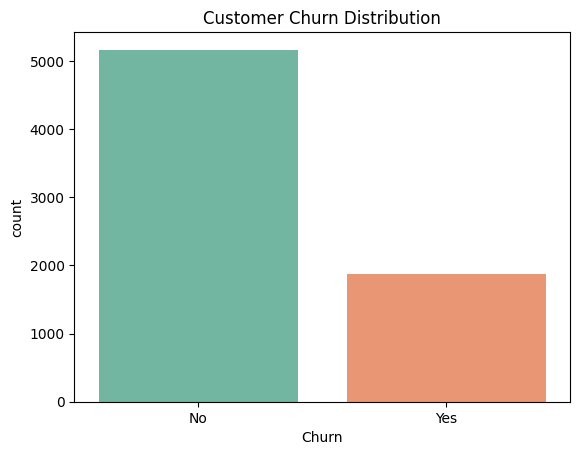

In [191]:
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Customer Churn Distribution")
plt.show()

# Gender vs Churn

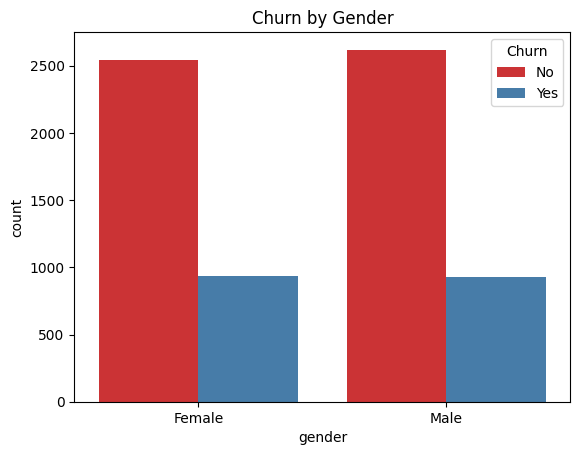

In [192]:
sns.countplot(data=df, x='gender', hue='Churn', palette='Set1')
plt.title("Churn by Gender")
plt.show()

# Contract Type vs Churn

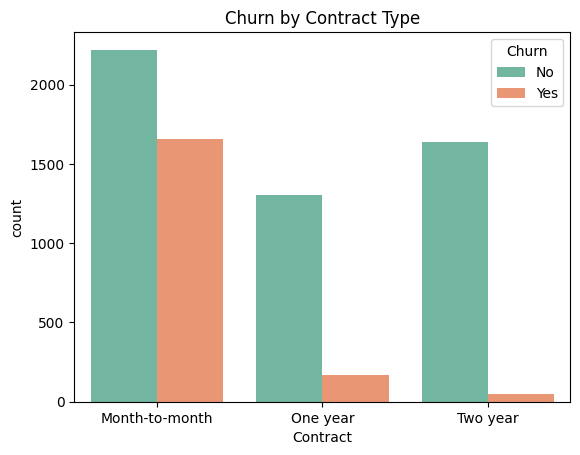

In [193]:
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title("Churn by Contract Type")
plt.show()

# Monthly Charges vs Churn

/tmp/ipykernel_58663/348316971.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')


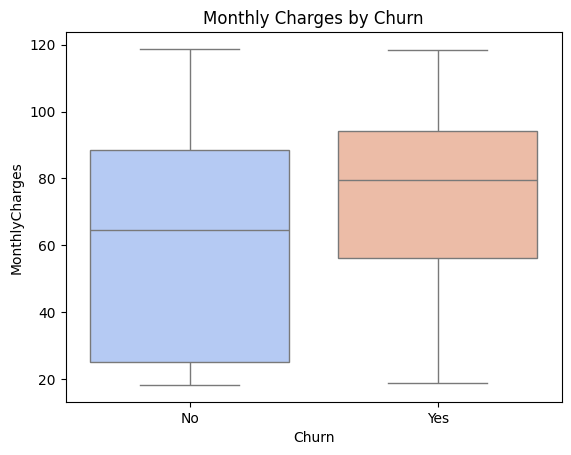

In [194]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title("Monthly Charges by Churn")
plt.show()

# Convert target to binary for correlation

In [195]:
df['Churn_encoded'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select numeric columns

In [196]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).copy()

# Add Churn_encoded to correlation

In [197]:
correlation = numeric_cols.corr()

# Plot heatmap

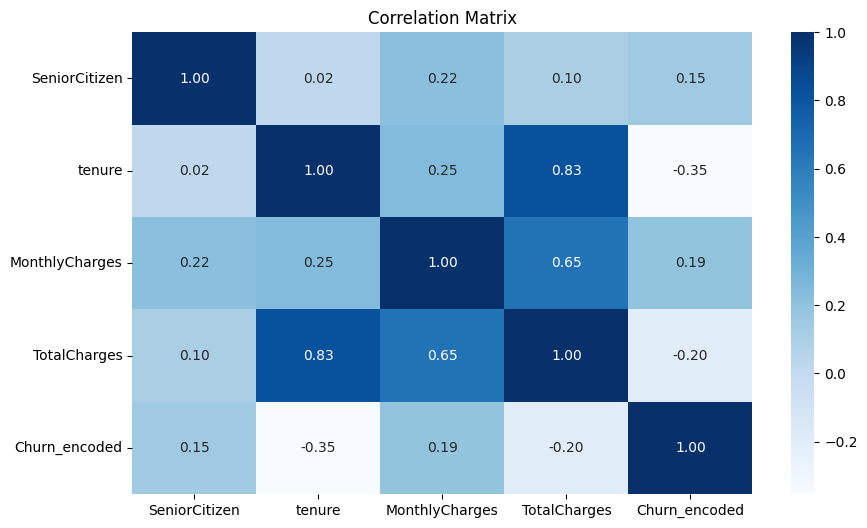

In [198]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 🔗 Correlation Matrix Insights

The heatmap visualizes the **Pearson correlation coefficients** between numerical features in the dataset. Key insights:

---

### 📌 Strong Correlations

- **`TotalCharges` ↔ `tenure`**: **0.83**
  - Very strong positive correlation — expected since longer tenure usually results in higher total charges.

- **`TotalCharges` ↔ `MonthlyCharges`**: **0.65**
  - Customers with higher monthly bills naturally accumulate higher total charges.

---

### 🧩 Moderate Correlations

- **`tenure` ↔ `MonthlyCharges`**: **0.25**
  - Weak to moderate correlation, suggesting pricing plans may not directly scale with time.

---

### 🎯 Correlation with Churn

| Feature          | Correlation with `Churn_encoded` |
|------------------|-----------------------------------|
| `tenure`         | **-0.35** (🔻 Negative)            |
| `TotalCharges`   | -0.20                             |
| `MonthlyCharges` | +0.19                             |
| `SeniorCitizen`  | +0.15                             |

- **`tenure` has the strongest (negative) correlation with churn**:  
  Customers with shorter tenures are more likely to churn.
  
- **`MonthlyCharges` and `SeniorCitizen` have positive but weak correlations**:  
  Customers with higher bills or those who are senior citizens are *slightly* more likely to churn.

---

### ✅ Takeaways

- **Focus on customers with short tenure and high bills** — they are at the highest churn risk.
- **Feature engineering** using tenure (like segmenting into bins) can enhance model performance.
- **TotalCharges may be redundant** if tenure and MonthlyCharges are already in the model (due to multicollinearity).



In [199]:
df['AvgChargesPerMonth'] = df['TotalCharges'] / (df['tenure'] + 1)

In [200]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [201]:
df['HasMultipleServices'] = ((df['InternetService'] != 'No') & (df['MultipleLines'] == 'Yes')).astype(int)

In [202]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).copy()
correlation = numeric_cols.corr()

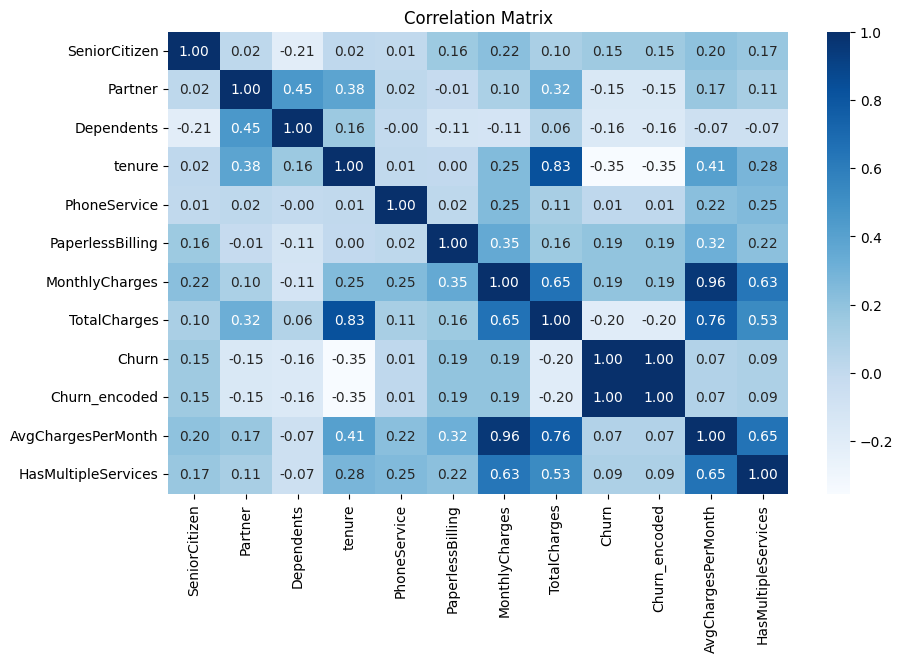

In [203]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7032 non-null   object 
 1   gender               7032 non-null   object 
 2   SeniorCitizen        7032 non-null   int64  
 3   Partner              7032 non-null   int64  
 4   Dependents           7032 non-null   int64  
 5   tenure               7032 non-null   int64  
 6   PhoneService         7032 non-null   int64  
 7   MultipleLines        7032 non-null   object 
 8   InternetService      7032 non-null   object 
 9   OnlineSecurity       7032 non-null   object 
 10  OnlineBackup         7032 non-null   object 
 11  DeviceProtection     7032 non-null   object 
 12  TechSupport          7032 non-null   object 
 13  StreamingTV          7032 non-null   object 
 14  StreamingMovies      7032 non-null   object 
 15  Contract             7032 non-null   object

In [205]:
label_cols = ['gender', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
              'TechSupport', 'StreamingTV', 'StreamingMovies', 
              'Contract', 'PaymentMethod', 'InternetService', 'tenure']

encoder = LabelEncoder()

for col in label_cols:
    df[col] = encoder.fit_transform(df[col])


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7032 non-null   object 
 1   gender               7032 non-null   int64  
 2   SeniorCitizen        7032 non-null   int64  
 3   Partner              7032 non-null   int64  
 4   Dependents           7032 non-null   int64  
 5   tenure               7032 non-null   int64  
 6   PhoneService         7032 non-null   int64  
 7   MultipleLines        7032 non-null   int64  
 8   InternetService      7032 non-null   int64  
 9   OnlineSecurity       7032 non-null   int64  
 10  OnlineBackup         7032 non-null   int64  
 11  DeviceProtection     7032 non-null   int64  
 12  TechSupport          7032 non-null   int64  
 13  StreamingTV          7032 non-null   int64  
 14  StreamingMovies      7032 non-null   int64  
 15  Contract             7032 non-null   int64 

In [207]:

columns_to_drop = [            
    'PhoneService',        
    'Partner',             
    'Dependents'           
]

df.drop(columns=columns_to_drop, axis=1, inplace=True)



In [208]:
X = df.drop(['customerID', 'Churn', 'Churn_encoded','HasMultipleServices','StreamingMovies','StreamingMovies','MultipleLines','StreamingTV','SeniorCitizen','PaperlessBilling','OnlineSecurity', 'DeviceProtection'], axis=1)
y = df['Churn']

In [209]:
X.columns

Index(['gender', 'tenure', 'InternetService', 'OnlineBackup', 'TechSupport',
       'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'AvgChargesPerMonth'],
      dtype='object')

In [210]:
ros = RandomOverSampler()
X,y = ros.fit_resample(X,y)
y.value_counts()


Churn
0    5163
1    5163
Name: count, dtype: int64

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [212]:
scaler = StandardScaler()
X_train[['MonthlyCharges', 'TotalCharges', 'AvgChargesPerMonth']] = scaler.fit_transform(
    X_train[['MonthlyCharges', 'TotalCharges', 'AvgChargesPerMonth']]
)


X_test[['MonthlyCharges', 'TotalCharges', 'AvgChargesPerMonth']] = scaler.transform(
    X_test[['MonthlyCharges', 'TotalCharges', 'AvgChargesPerMonth']]
)


In [213]:
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [214]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/techno/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [215]:
y_pred_logreg = logreg.predict(X_test)

In [216]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7512100677637947
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1037
           1       0.73      0.79      0.76      1029

    accuracy                           0.75      2066
   macro avg       0.75      0.75      0.75      2066
weighted avg       0.75      0.75      0.75      2066



In [217]:
joblib.dump(logreg, "logreg_model.joblib")

['logreg_model.joblib']

In [218]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [219]:
y_pred_rf = rf.predict(X_test)

In [220]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8906098741529526
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1037
           1       0.84      0.96      0.90      1029

    accuracy                           0.89      2066
   macro avg       0.90      0.89      0.89      2066
weighted avg       0.90      0.89      0.89      2066



In [221]:
joblib.dump(rf, "rf_model.joblib")

['rf_model.joblib']

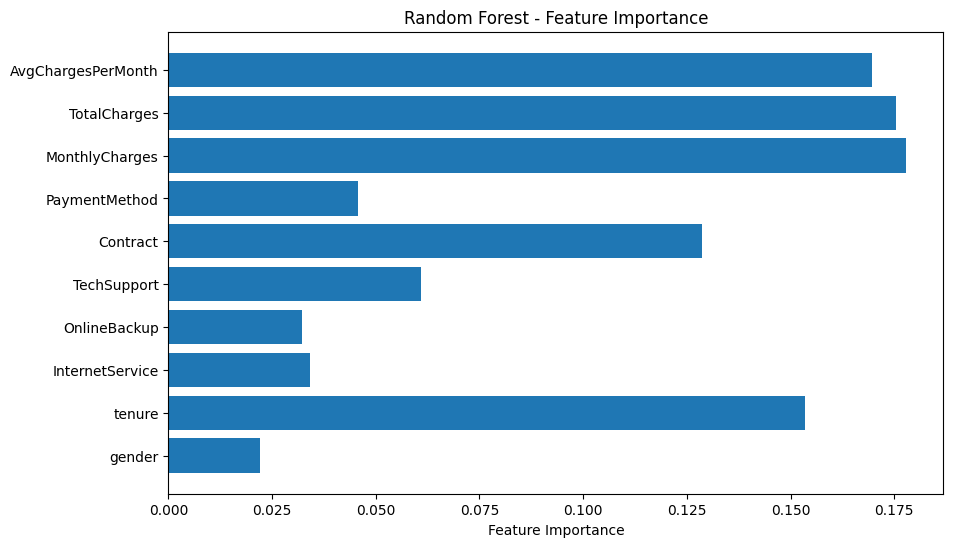

In [222]:
feature_importances = rf.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.show()

In [223]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [224]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                     
    scoring='accuracy',       
    n_jobs=-1,               
    verbose=2                 
)


In [225]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_depth

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [226]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.8693704600484262


In [227]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1037
           1       0.85      0.96      0.90      1029

    accuracy                           0.89      2066
   macro avg       0.90      0.89      0.89      2066
weighted avg       0.90      0.89      0.89      2066



/tmp/ipykernel_58663/226342434.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/techno/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


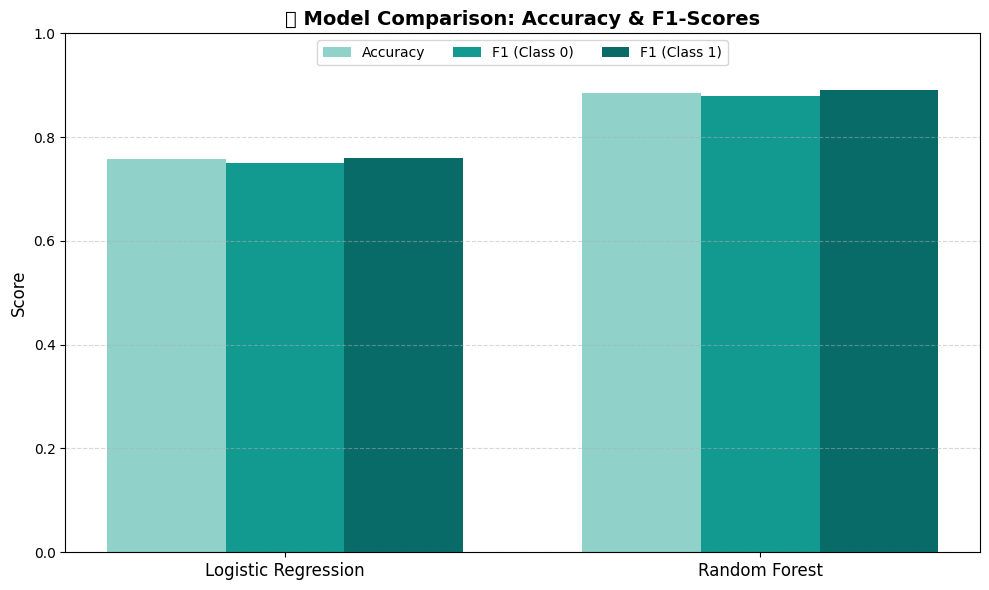

In [242]:
import numpy as np

models = ['Logistic Regression', 'Random Forest']
accuracy = [0.7575, 0.8843]
f1_class_0 = [0.75, 0.88]
f1_class_1 = [0.76, 0.89]

x = np.arange(len(models))  
bar_width = 0.25


colors = ['#90D1CA', '#129990', '#096B68']


plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, accuracy, width=bar_width, label='Accuracy', color=colors[0])
plt.bar(x, f1_class_0, width=bar_width, label='F1 (Class 0)', color=colors[1])
plt.bar(x + bar_width, f1_class_1, width=bar_width, label='F1 (Class 1)', color=colors[2])


plt.xticks(x, models, fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('📊 Model Comparison: Accuracy & F1-Scores', fontsize=14, weight='bold')
plt.ylim(0, 1)
plt.legend(loc='upper center',  ncol=3)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 📊 Model Performance Comparison

We evaluated two classification models to predict customer churn:

### 🔹 Logistic Regression
- **Accuracy:** 75.75%
- **Precision (Class 1):** 74%
- **Recall (Class 1):** 78%
- **F1-Score (Class 1):** 76%

Logistic Regression performs reasonably well, but tends to misclassify some customers who actually churned, as shown by its relatively lower recall for Class 0.

---

### 🔹 Random Forest Classifier
- **Accuracy:** 88.43%
- **Precision (Class 1):** 84%
- **Recall (Class 1):** 94%
- **F1-Score (Class 1):** 89%

Random Forest significantly outperforms Logistic Regression across all metrics. It has a **higher recall and F1-score**, indicating better ability to capture churned customers.

---

### 🏆 Conclusion

✅ **Random Forest** is the preferred model for this task due to its superior accuracy and balanced performance across both classes.  
⚠️ Logistic Regression may still be considered if interpretability or simplicity is prioritized.


